In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [20]:
tweet_dtypes: dict = {
    "user_id": "str",
    "tweet_id": "str",
    "retweeted_status_id": "str",
    "in_reply_to_status_id": "str"
}
user_dtype: dict = {
    "id": "str"
}

In [21]:
df_tweets = pd.read_csv('tweets.csv', dtype=tweet_dtypes)
df_users = pd.read_csv('users.csv', dtype=user_dtype)

In [22]:
df_users

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,100345056,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
1,247165706,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
2,249538861,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
3,449689677,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0
4,471868887,"Санкт-Петербург, Россия",Маргарита Саваж,23305.0,18401.0,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,Mon Jan 23 10:26:25 +0000 2012,1480.0,8021.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ReachItDoIt,NaN,NaN,NaN,NaN,NaN
449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KirstenLaDaniel,NaN,NaN,NaN,NaN,NaN
450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gwen_garland,NaN,NaN,NaN,NaN,NaN
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KlausFinker,NaN,NaN,NaN,NaN,NaN


In [23]:
df_tweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2532611755,kathiemrr,1.488207e+12,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,836227891897651201,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2531159968,traceyhappymom,1.471273e+12,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,765198948239810561,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1.435701e+12,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,616002306572746752,NaN,[],[],POSTED,[],NaN,NaN
3,4840551713,blacktolive,1.474013e+12,2016-09-16 08:04:48,18.0,False,17.0,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,776693302926147584,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1694026190,jacquelinisbest,1.474228e+12,2016-09-18 19:46:25,0.0,False,0.0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203446,1710804738,cookncooks,1.480735e+12,2016-12-03 03:16:17,NaN,NaN,NaN,RT @FairyTale_360: 6) Rexnord Bearings is set ...,804886948712157184,NaN,[],[],POSTED,[],NaN,NaN
203447,2928870434,newspeakdaily,1.475279e+12,2016-09-30 23:39:11,0.0,False,0.0,Will Trump’s Bad Week Hurt the GOP’s Senate Pr...,782001880834592769,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""Politics""]",[],POSTED,[],NaN,NaN
203448,2951556370,specialaffair,1.473072e+12,2016-09-05 10:45:09,0.0,False,0.0,"China blames United States, journalists for Ob...",772747389287268352,"<a href=""http://twitterfeed.com"" rel=""nofollow...","[""news""]",[],POSTED,[],NaN,NaN
203449,2671070290,patriotblake,1.486385e+12,2017-02-06 12:36:14,NaN,NaN,NaN,RT @bfraser747: 💥💥 #PresidentElectTrump \r\n\r...,828583075810525184,NaN,[],[],POSTED,[],NaN,NaN


In [24]:
df_users.columns

Index(['id', 'location', 'name', 'followers_count', 'statuses_count',
       'time_zone', 'verified', 'lang', 'screen_name', 'description',
       'created_at', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

In [25]:
df_tweets.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id'],
      dtype='object')

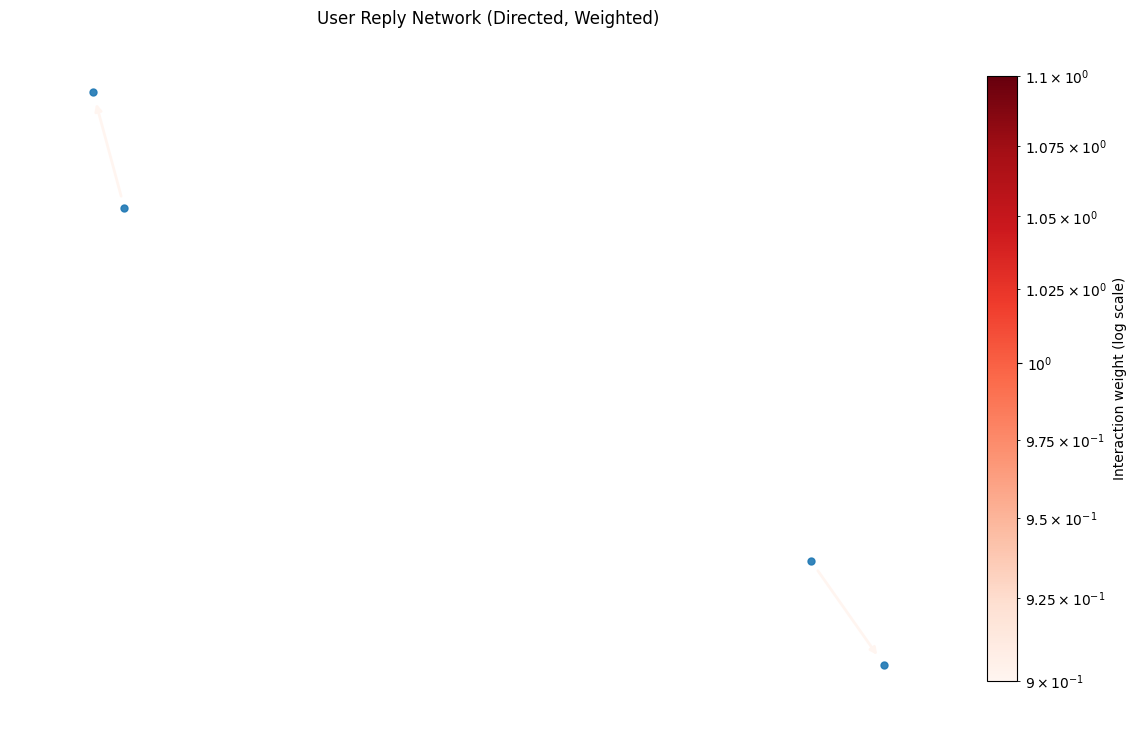

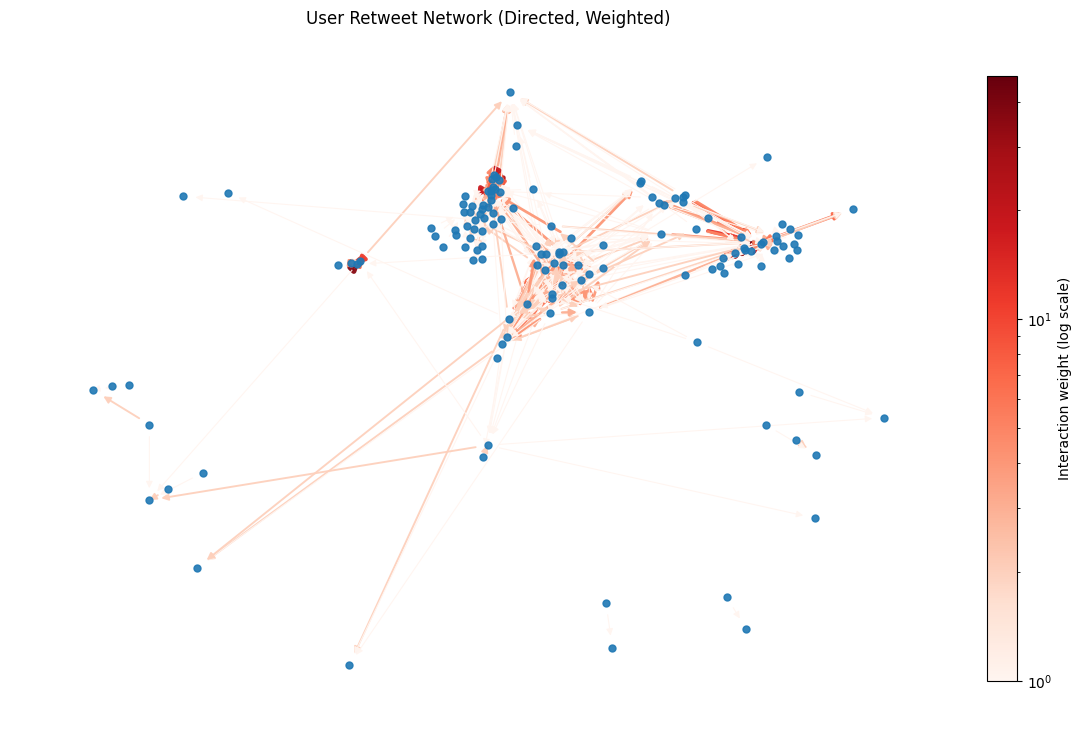

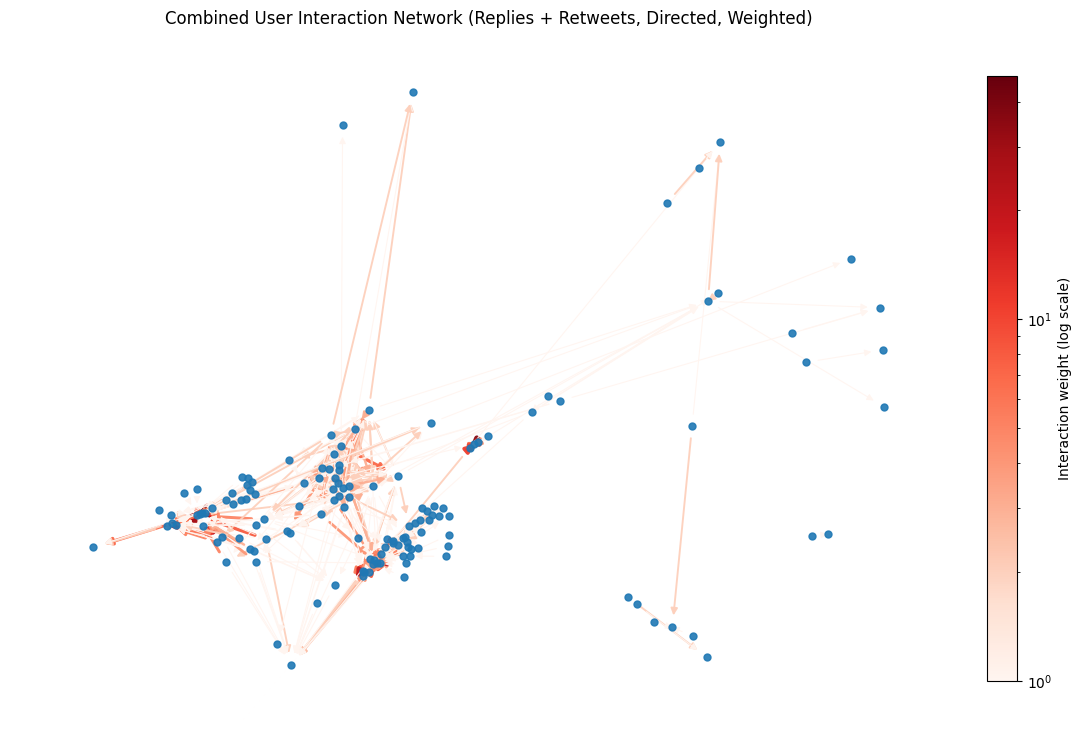

In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

df = df_tweets.copy()

df["tweet_id"] = df["tweet_id"].astype(str)
df["user_id"] = df["user_id"].astype(str)

for col in ["retweeted_status_id", "in_reply_to_status_id"]:
    if col in df.columns:
        df[col] = df[col].astype(str).where(df[col].notna(), pd.NA)

tweet_to_user = df[["tweet_id", "user_id"]].drop_duplicates("tweet_id")

def build_weighted_user_graph(edge_df: pd.DataFrame, u_col: str, v_col: str) -> nx.DiGraph:
    counts = (
        edge_df[[u_col, v_col]]
        .dropna()
        .astype(str)
        .query(f"{u_col} != {v_col}")
        .value_counts()
        .reset_index(name="weight")
    )
    G = nx.DiGraph()
    for u, v, w in counts.itertuples(index=False):
        G.add_edge(u, v, weight=int(w))
    return G

def plot_weighted_graph(G: nx.DiGraph, title: str, seed: int = 42, k: float | None = None):
    fig, ax = plt.subplots(figsize=(13, 9))

    if G.number_of_nodes() == 0:
        ax.set_title(title)
        ax.axis("off")
        plt.show()
        return

    pos = nx.spring_layout(G, seed=seed, k=k)

    weights = np.array([G[u][v].get("weight", 1) for u, v in G.edges()], dtype=float)
    w_min, w_max = max(1.0, weights.min()), weights.max()

    norm = mpl.colors.LogNorm(vmin=w_min, vmax=w_max)
    cmap = plt.cm.Reds
    edge_colors = cmap(norm(weights))

    edge_widths = 0.8 + 3.2 * (np.log(weights) - np.log(w_min)) / (np.log(w_max) - np.log(w_min)) \
        if w_max > w_min else np.full_like(weights, 2.0)

    nx.draw_networkx_nodes(G, pos, node_size=25, alpha=0.9, ax=ax)
    nx.draw_networkx_edges(
        G, pos,
        arrows=True,
        arrowsize=10,
        width=edge_widths,
        edge_color=edge_colors,
        alpha=0.95,
        ax=ax
    )

    ax.set_title(title)
    ax.axis("off")

    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
    cbar.set_label("Interaction weight (log scale)")

    plt.show()

reply_edges = df.loc[df["in_reply_to_status_id"].notna(), ["user_id", "in_reply_to_status_id"]].rename(
    columns={"user_id": "user_u", "in_reply_to_status_id": "parent_tweet_id"}
)
reply_edges = reply_edges.merge(
    tweet_to_user.rename(columns={"tweet_id": "parent_tweet_id", "user_id": "user_v"}),
    on="parent_tweet_id",
    how="left"
).dropna(subset=["user_v"])

retweet_edges = df.loc[df["retweeted_status_id"].notna(), ["user_id", "retweeted_status_id"]].rename(
    columns={"user_id": "user_u", "retweeted_status_id": "parent_tweet_id"}
)
retweet_edges = retweet_edges.merge(
    tweet_to_user.rename(columns={"tweet_id": "parent_tweet_id", "user_id": "user_v"}),
    on="parent_tweet_id",
    how="left"
).dropna(subset=["user_v"])

G_reply = build_weighted_user_graph(reply_edges, "user_u", "user_v")
G_retweet = build_weighted_user_graph(retweet_edges, "user_u", "user_v")

combined_edges = pd.concat(
    [reply_edges[["user_u", "user_v"]], retweet_edges[["user_u", "user_v"]]],
    ignore_index=True
)
G_combined = build_weighted_user_graph(combined_edges, "user_u", "user_v")

plot_weighted_graph(G_reply, "User Reply Network (Directed, Weighted)")
plot_weighted_graph(G_retweet, "User Retweet Network (Directed, Weighted)")
plot_weighted_graph(G_combined, "Combined User Interaction Network (Replies + Retweets, Directed, Weighted)")


In [ ]:
users = pd.read_csv('users.csv', dtype=user_dtype)

In [28]:
users.columns 

Index(['id', 'location', 'name', 'followers_count', 'statuses_count',
       'time_zone', 'verified', 'lang', 'screen_name', 'description',
       'created_at', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

In [31]:
users.dtypes

id                   object
location             object
name                 object
followers_count     float64
statuses_count      float64
time_zone            object
verified             object
lang                 object
screen_name          object
description          object
created_at           object
favourites_count    float64
friends_count       float64
listed_count        float64
dtype: object

In [32]:
import pandas as pd
import numpy as np
import networkx as nx

users = pd.read_csv("users.csv")

df = df_tweets.copy()
df["tweet_id"] = df["tweet_id"].astype(str)
df["user_id"] = df["user_id"].astype(str)

df["retweeted_status_id"] = (
    df["retweeted_status_id"]
    .astype("Int64", errors="ignore")
    if str(df["retweeted_status_id"].dtype) != "object"
    else df["retweeted_status_id"]
)
df["retweeted_status_id"] = df["retweeted_status_id"].astype(str).where(df["retweeted_status_id"].notna(), pd.NA)

users["id"] = users["id"].astype(str)

tweet_to_user = df[["tweet_id", "user_id"]].drop_duplicates("tweet_id")

retweet_edges = (
    df.loc[df["retweeted_status_id"].notna(), ["user_id", "retweeted_status_id"]]
    .rename(columns={"user_id": "user_v", "retweeted_status_id": "tweet_u"})
    .merge(
        tweet_to_user.rename(columns={"tweet_id": "tweet_u", "user_id": "user_u"}),
        on="tweet_u",
        how="left",
    )
)

retweet_edges["user_u"] = retweet_edges["user_u"].astype(str).where(retweet_edges["user_u"].notna(), pd.NA)
retweet_edges = (
    retweet_edges.dropna(subset=["user_u"])
    .query("user_v != user_u")
    [["user_v", "user_u"]]
)

counts = retweet_edges.value_counts().reset_index(name="weight")

G_retweet = nx.DiGraph()
for user_v, user_u, w in counts.itertuples(index=False):
    G_retweet.add_edge(str(user_v), str(user_u), weight=int(w))

in_deg_w = dict(G_retweet.in_degree(weight="weight"))
out_deg_w = dict(G_retweet.out_degree(weight="weight"))
in_deg = dict(G_retweet.in_degree())
out_deg = dict(G_retweet.out_degree())

deg_df = pd.DataFrame({
    "user_id": list(G_retweet.nodes()),
    "in_degree_w": [in_deg_w.get(u, 0) for u in G_retweet.nodes()],
    "out_degree_w": [out_deg_w.get(u, 0) for u in G_retweet.nodes()],
    "in_degree": [in_deg.get(u, 0) for u in G_retweet.nodes()],
    "out_degree": [out_deg.get(u, 0) for u in G_retweet.nodes()],
}).sort_values(["in_degree_w", "in_degree"], ascending=False)

meta_cols = [
    "id",
    "screen_name",
    "name",
    "verified",
    "lang",
    "location",
    "time_zone",
    "followers_count",
    "friends_count",
    "listed_count",
    "statuses_count",
    "favourites_count",
    "created_at",
    "description",
]
user_meta = users[meta_cols].drop_duplicates("id")
deg_df = deg_df.merge(user_meta, left_on="user_id", right_on="id", how="left").drop(columns=["id"])

def _missing(x):
    if x is None:
        return True
    if isinstance(x, float) and np.isnan(x):
        return True
    if isinstance(x, pd._libs.missing.NAType):
        return True
    if isinstance(x, str):
        s = x.strip()
        return s == "" or s.lower() in {"nan", "none", "<na>"}
    return False

def _fmt(x):
    return "[missing]" if _missing(x) else str(x)

TOP_K = 30

print(f"Top {TOP_K} users by weighted in-degree (being retweeted):")
for rank, row in enumerate(deg_df.head(TOP_K).to_dict("records"), start=1):
    print("\n" + "=" * 90)
    print(f"Rank            : {rank}")
    print(f"User ID         : {row['user_id']}")
    print(f"Weighted in-deg : {int(row['in_degree_w'])}")
    print(f"Weighted out-deg: {int(row['out_degree_w'])}")
    print(f"In-deg (unique) : {int(row['in_degree'])}")
    print(f"Out-deg (unique): {int(row['out_degree'])}")

    print(f"{'Screen name':<14}: {_fmt(row.get('screen_name'))}")
    print(f"{'Name':<14}: {_fmt(row.get('name'))}")
    print(f"{'Verified':<14}: {_fmt(row.get('verified'))}")
    print(f"{'Lang':<14}: {_fmt(row.get('lang'))}")
    print(f"{'Location':<14}: {_fmt(row.get('location'))}")
    print(f"{'Time zone':<14}: {_fmt(row.get('time_zone'))}")
    print(f"{'Followers':<14}: {_fmt(row.get('followers_count'))}")
    print(f"{'Friends':<14}: {_fmt(row.get('friends_count'))}")
    print(f"{'Listed':<14}: {_fmt(row.get('listed_count'))}")
    print(f"{'Statuses':<14}: {_fmt(row.get('statuses_count'))}")
    print(f"{'Favourites':<14}: {_fmt(row.get('favourites_count'))}")
    print(f"{'Created at':<14}: {_fmt(row.get('created_at'))}")
    print("Description    :")
    print(_fmt(row.get("description")))


Top 30 users by weighted in-degree (being retweeted):

Rank            : 1
User ID         : 4224729994
Weighted in-deg : 239
Weighted out-deg: 46
In-deg (unique) : 43
Out-deg (unique): 6
Screen name   : [missing]
Name          : [missing]
Verified      : [missing]
Lang          : [missing]
Location      : [missing]
Time zone     : [missing]
Followers     : [missing]
Friends       : [missing]
Listed        : [missing]
Statuses      : [missing]
Favourites    : [missing]
Created at    : [missing]
Description    :
[missing]

Rank            : 2
User ID         : 2496599688
Weighted in-deg : 102
Weighted out-deg: 41
In-deg (unique) : 11
Out-deg (unique): 13
Screen name   : [missing]
Name          : [missing]
Verified      : [missing]
Lang          : [missing]
Location      : [missing]
Time zone     : [missing]
Followers     : [missing]
Friends       : [missing]
Listed        : [missing]
Statuses      : [missing]
Favourites    : [missing]
Created at    : [missing]
Description    :
[missing]

In [ ]:

uid = "1646999972"
print("uid in users:", uid in set(users["id"].astype(str)))

tweet_user_ids = set(df["user_id"].astype(str).unique())
users_ids = set(users["id"].astype(str).unique())
missing_users = tweet_user_ids - users_ids
print("tweet users:", len(tweet_user_ids))
print("users.csv users:", len(users_ids))
print("missing users count:", len(missing_users))
print("example missing:", list(sorted(missing_users))[:20])

s = users["id"].astype(str)
print("examples of users['id']:", s.head(10).tolist())
print("any '.0' ids:", s.str.endswith(".0").any())


uid in users: False
tweet users: 393
users.csv users: 393
missing users count: 392
example missing: ['100345056', '1039581360', '1497280638', '1504356343', '1510488662', '1512371617', '1513801268', '1517678892', '1518857420', '1527133837', '1532863891', '1533813962', '1534083420', '1584279696', '1594887416', '1612106972', '1617939218', '1620474397', '1621376306', '1623062953']
examples of users['id']: ['100345056.0', '247165706.0', '249538861.0', '449689677.0', '471868887.0', '1039581360.0', '1510488662.0', '1513801268.0', '1517678892.0', '1518857420.0']
any '.0' ids: True


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

df = df_tweets.copy()
users = df_users.copy()

df["tweet_id"] = df["tweet_id"].astype(str).str.strip()
df["user_id"] = df["user_id"].astype(str).str.strip()

for col in ["retweeted_status_id", "in_reply_to_status_id"]:
    if col in df.columns:
        df[col] = df[col].astype(str).where(df[col].notna(), pd.NA)

users["id_norm"] = (
    users["id"]
    .astype(str)
    .str.strip()
    .str.replace(r"\.0$", "", regex=True)
)

tweet_to_user = (
    df[["tweet_id", "user_id"]]
    .drop_duplicates("tweet_id")
    .assign(user_id_norm=lambda x: x["user_id"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True))
)

retweet_edges = (
    df.loc[df["retweeted_status_id"].notna(), ["user_id", "retweeted_status_id"]]
    .rename(columns={"user_id": "user_u", "retweeted_status_id": "parent_tweet_id"})
    .assign(
        user_u_norm=lambda x: x["user_u"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True),
        parent_tweet_id=lambda x: x["parent_tweet_id"].astype(str).str.strip()
    )
    .merge(
        tweet_to_user.rename(columns={"tweet_id": "parent_tweet_id", "user_id_norm": "user_v_norm"}),
        on="parent_tweet_id",
        how="left"
    )
    .dropna(subset=["user_v_norm"])
)

counts = (
    retweet_edges[["user_u_norm", "user_v_norm"]]
    .dropna()
    .query("user_u_norm != user_v_norm")
    .value_counts()
    .reset_index(name="weight")
)

G_retweet = nx.DiGraph()
for u, v, w in counts.itertuples(index=False):
    G_retweet.add_edge(u, v, weight=int(w))

in_w = dict(G_retweet.in_degree(weight="weight"))
out_w = dict(G_retweet.out_degree(weight="weight"))
in_u = dict(G_retweet.in_degree())
out_u = dict(G_retweet.out_degree())

deg_df = (
    pd.DataFrame({"user_id": list(G_retweet.nodes())})
    .assign(
        w_in=lambda x: x["user_id"].map(in_w).fillna(0).astype(int),
        w_out=lambda x: x["user_id"].map(out_w).fillna(0).astype(int),
        in_deg=lambda x: x["user_id"].map(in_u).fillna(0).astype(int),
        out_deg=lambda x: x["user_id"].map(out_u).fillna(0).astype(int),
    )
    .sort_values(["w_in", "w_out"], ascending=False)
    .reset_index(drop=True)
)

user_cols = [
    "id_norm", "screen_name", "name", "verified", "lang", "location", "time_zone",
    "followers_count", "friends_count", "listed_count", "statuses_count",
    "favourites_count", "created_at", "description"
]
users_small = users[user_cols].drop_duplicates("id_norm")

deg_df = deg_df.merge(users_small, left_on="user_id", right_on="id_norm", how="left").drop(columns=["id_norm"])

top_n = 30
for i, row in deg_df.head(top_n).iterrows():
    print("\n" + "=" * 90)
    print(f"Rank            : {i+1}")
    print(f"User ID         : {row['user_id']}")
    print(f"Weighted in-deg : {row['w_in']}")
    print(f"Weighted out-deg: {row['w_out']}")
    print(f"In-deg (unique) : {row['in_deg']}")
    print(f"Out-deg (unique): {row['out_deg']}")
    print(f"Screen name     : {row.get('screen_name', np.nan)}")
    print(f"Name            : {row.get('name', np.nan)}")
    print(f"Verified        : {row.get('verified', np.nan)}")
    print(f"Lang            : {row.get('lang', np.nan)}")
    print(f"Location        : {row.get('location', np.nan)}")
    print(f"Time zone       : {row.get('time_zone', np.nan)}")
    print(f"Followers       : {row.get('followers_count', np.nan)}")
    print(f"Friends         : {row.get('friends_count', np.nan)}")
    print(f"Listed          : {row.get('listed_count', np.nan)}")
    print(f"Statuses        : {row.get('statuses_count', np.nan)}")
    print(f"Favourites      : {row.get('favourites_count', np.nan)}")
    print(f"Created at      : {row.get('created_at', np.nan)}")
    print("Description     :")
    print(row.get("description", np.nan))



Rank            : 1
User ID         : 4224729994
Weighted in-deg : 239
Weighted out-deg: 46
In-deg (unique) : 43
Out-deg (unique): 6
Screen name     : TEN_GOP
Name            : nan
Verified        : nan
Lang            : nan
Location        : nan
Time zone       : nan
Followers       : nan
Friends         : nan
Listed          : nan
Statuses        : nan
Favourites      : nan
Created at      : nan
Description     :
nan

Rank            : 2
User ID         : 2496599688
Weighted in-deg : 102
Weighted out-deg: 41
In-deg (unique) : 11
Out-deg (unique): 13
Screen name     : NotRitaHart
Name            : Rita Hart
Verified        : False
Lang            : en
Location        : Atlanta
Time zone       : Eastern Time (US & Canada)
Followers       : 1619.0
Friends         : 2802.0
Listed          : 21.0
Statuses        : 2224.0
Favourites      : 1657.0
Created at      : Thu May 15 15:46:10 +0000 2014
Description     :
Lost in the moment

Rank            : 3
User ID         : 2882013788
Weighted

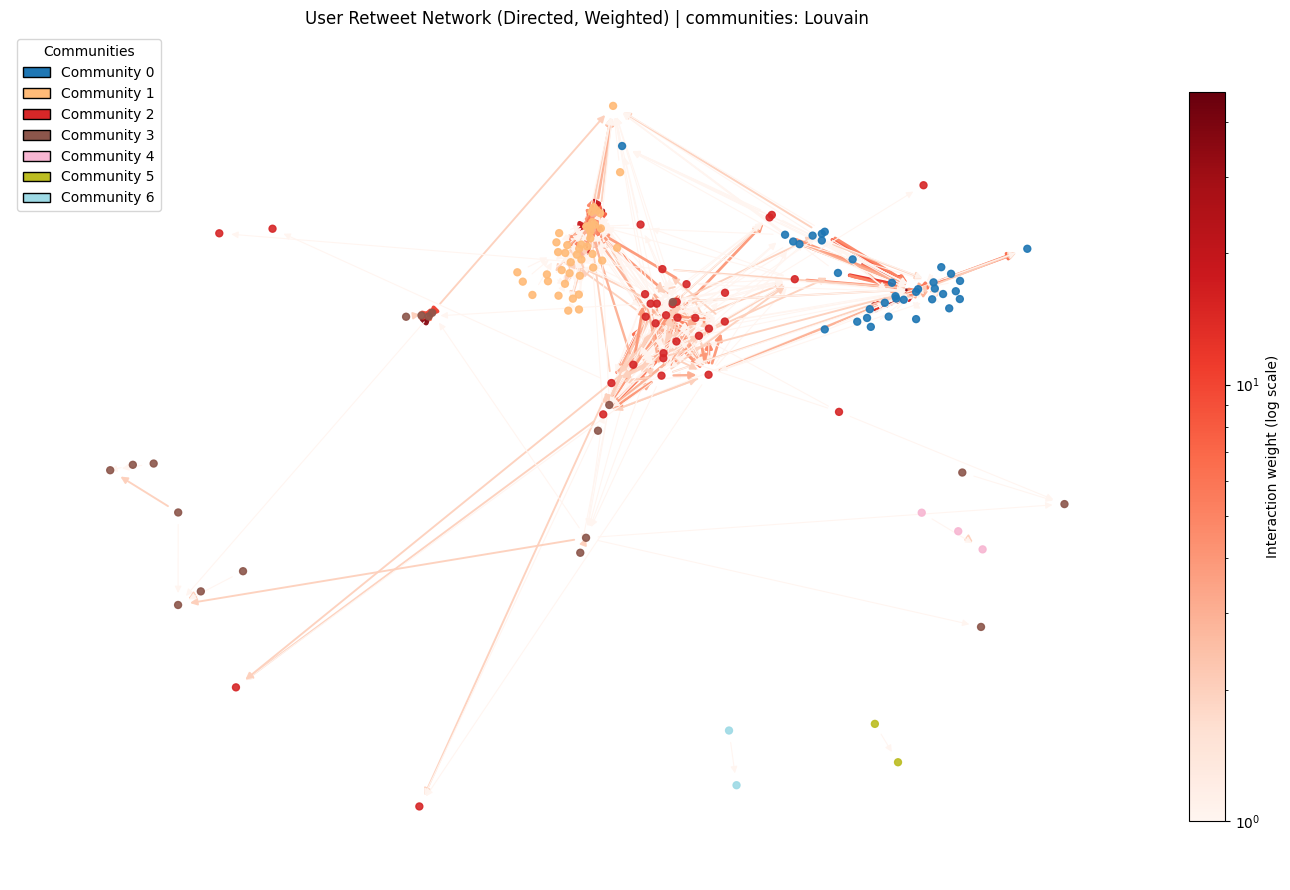

In [43]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.colors import Normalize

df = df_tweets.copy()

df["tweet_id"] = df["tweet_id"].astype(str).str.strip()
df["user_id"] = df["user_id"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True)
df["retweeted_status_id"] = df["retweeted_status_id"].astype(str).str.strip().where(
    df["retweeted_status_id"].notna(), pd.NA
)

tweet_to_user = (
    df[["tweet_id", "user_id"]]
    .drop_duplicates("tweet_id")
    .rename(columns={"user_id": "author_user"})
)

retweet_edges = (
    df.loc[df["retweeted_status_id"].notna(), ["user_id", "retweeted_status_id"]]
    .rename(columns={"user_id": "user_u", "retweeted_status_id": "parent_tweet_id"})
    .merge(
        tweet_to_user.rename(columns={"tweet_id": "parent_tweet_id", "author_user": "user_v"}),
        on="parent_tweet_id",
        how="left"
    )
    .dropna(subset=["user_v"])
)

counts = (
    retweet_edges[["user_u", "user_v"]]
    .query("user_u != user_v")
    .value_counts()
    .reset_index(name="weight")
)

G = nx.DiGraph()
for u, v, w in counts.itertuples(index=False):
    G.add_edge(u, v, weight=int(w))

Gu = nx.Graph()
for u, v, d in G.edges(data=True):
    w = d["weight"]
    if Gu.has_edge(u, v):
        Gu[u][v]["weight"] += w
    else:
        Gu.add_edge(u, v, weight=w)

try:
    from networkx.algorithms.community import louvain_communities
    communities = louvain_communities(Gu, weight="weight", seed=42)
    method = "Louvain"
except Exception:
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(Gu, weight="weight"))
    method = "GreedyModularity"

community_map = {}
for cid, comm in enumerate(communities):
    for n in comm:
        community_map[n] = cid

pos = nx.spring_layout(G, seed=42)

weights = np.array([G[u][v]["weight"] for u, v in G.edges()], dtype=float)
w_min, w_max = max(1.0, weights.min()), weights.max()

norm_edges = mpl.colors.LogNorm(vmin=w_min, vmax=w_max)
edge_colors = plt.cm.Reds(norm_edges(weights))
edge_widths = 0.8 + 3.2 * (np.log(weights) - np.log(w_min)) / (np.log(w_max) - np.log(w_min)) \
    if w_max > w_min else np.full_like(weights, 2.0)

fig, ax = plt.subplots(figsize=(13, 9))

nodes = list(G.nodes())
cids = np.array([community_map.get(n, -1) for n in nodes], dtype=int)
valid = cids >= 0

cmap_nodes = plt.cm.tab20
cid_values = np.unique(cids[valid]) if valid.any() else np.array([0], dtype=int)
cid_min, cid_max = int(cid_values.min()), int(cid_values.max())
norm_nodes = Normalize(vmin=cid_min, vmax=cid_max)

node_rgba = np.zeros((len(nodes), 4))
node_rgba[~valid] = (0.6, 0.6, 0.6, 1.0)
node_rgba[valid] = cmap_nodes(norm_nodes(cids[valid]))

nx.draw_networkx_nodes(
    G, pos,
    nodelist=nodes,
    node_size=25,
    node_color=node_rgba,
    alpha=0.9,
    ax=ax
)

nx.draw_networkx_edges(
    G, pos,
    arrows=True,
    arrowsize=10,
    width=edge_widths,
    edge_color=edge_colors,
    alpha=0.95,
    ax=ax
)

ax.set_title(f"User Retweet Network (Directed, Weighted) | communities: {method}")
ax.axis("off")

sm = mpl.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm_edges)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Interaction weight (log scale)")

legend_handles = []
for cid in sorted(cid_values.tolist()):
    legend_color = cmap_nodes(norm_nodes(cid))
    legend_handles.append(Patch(facecolor=legend_color, edgecolor="black", label=f"Community {cid}"))

if not valid.all():
    legend_handles.append(Patch(facecolor=(0.6, 0.6, 0.6, 1.0), edgecolor="black", label="Unassigned"))

ax.legend(
    handles=legend_handles,
    title="Communities",
    loc="upper left",
    frameon=True
)

plt.tight_layout()
plt.show()


In [40]:
from collections import defaultdict

community_nodes = defaultdict(list)
for node, cid in community_map.items():
    community_nodes[cid].append(node)

print("=" * 90)
print(f"Detected communities using {method}")
print("=" * 90)

for cid, nodes in sorted(community_nodes.items(), key=lambda x: len(x[1]), reverse=True):
    sub = G.subgraph(nodes)

    weighted_in = sum(
        d["weight"] for _, _, d in sub.in_edges(nodes, data=True)
    )
    weighted_out = sum(
        d["weight"] for _, _, d in sub.out_edges(nodes, data=True)
    )

    print("\n" + "-" * 90)
    print(f"Community ID        : {cid}")
    print(f"Number of users     : {len(nodes)}")
    print(f"Weighted in-degree  : {weighted_in}")
    print(f"Weighted out-degree : {weighted_out}")
    print("Users:")
    for u in nodes[:20]:
        print(f"  - {u}")
    if len(nodes) > 20:
        print(f"  ... (+{len(nodes) - 20} more)")


Detected communities using Louvain

------------------------------------------------------------------------------------------
Community ID        : 1
Number of users     : 42
Weighted in-degree  : 817
Weighted out-degree : 817
Users:
  - 2535353390
  - 2531159968
  - 1650310652
  - 2540596597
  - 1512371617
  - 1532863891
  - 2536146374
  - 1727482238
  - 2742482932
  - 1668307436
  - 2580516159
  - 2584152521
  - 2532611755
  - 2572092279
  - 2541945841
  - 1674083671
  - 1650681522
  - 4508630900
  - 2589353987
  - 2533001646
  ... (+22 more)

------------------------------------------------------------------------------------------
Community ID        : 0
Number of users     : 35
Weighted in-degree  : 441
Weighted out-degree : 441
Users:
  - 1621376306
  - 4272870988
  - 1623062953
  - 4224729994
  - 1533813962
  - 2563274242
  - 2882331822
  - 1877492857
  - 1661246144
  - 2535166748
  - 737420000043139072
  - 2559217373
  - 1678552327
  - 1671234620
  - 2388391757
  - 1651693646


In [ ]:
from collections import defaultdict


users = df_users.copy()
users["id"] = users["id"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True)

meta_cols = [
    "id", "screen_name", "name", "verified", "lang", "location", "time_zone",
    "followers_count", "friends_count", "listed_count", "statuses_count",
    "favourites_count", "created_at", "description"
]
meta_cols = [c for c in meta_cols if c in users.columns]

meta = (
    users[meta_cols]
    .drop_duplicates("id")
    .set_index("id")
)

def _safe(v):
    if v is None:
        return "[missing]"
    if isinstance(v, float) and np.isnan(v):
        return "[missing]"
    s = str(v)
    if s.strip() == "" or s.strip().lower() in {"nan", "none"}:
        return "[missing]"
    return s

community_nodes = defaultdict(list)
for node, cid in community_map.items():
    community_nodes[cid].append(node)

print("=" * 110)
print(f"Detected communities using {method} | user descriptions (top 10 by internal weighted degree)")
print("=" * 110)

for cid, nodes in sorted(community_nodes.items(), key=lambda x: len(x[1]), reverse=True):
    sub = G.subgraph(nodes)

    # total interaction volume inside the community (only internal edges)
    weighted_in = sum(d["weight"] for _, _, d in sub.in_edges(nodes, data=True))
    weighted_out = sum(d["weight"] for _, _, d in sub.out_edges(nodes, data=True))

    # rank users inside community by internal weighted degree (in+out, internal only)
    internal_scores = []
    for u in nodes:
        w_in_u = sum(d["weight"] for _, _, d in sub.in_edges(u, data=True))
        w_out_u = sum(d["weight"] for _, _, d in sub.out_edges(u, data=True))
        internal_scores.append((u, int(w_in_u), int(w_out_u), int(w_in_u + w_out_u)))

    internal_scores.sort(key=lambda t: (t[3], t[1], t[2]), reverse=True)
    topk = internal_scores[: min(10, len(internal_scores))]

    print("\n" + "-" * 110)
    print(f"Community ID        : {cid}")
    print(f"Number of users     : {len(nodes)}")
    print(f"Weighted in-degree  : {int(weighted_in)}  (internal)")
    print(f"Weighted out-degree : {int(weighted_out)} (internal)")
    print(f"Top users shown     : {len(topk)} (ranked by internal weighted degree)")

    for rank, (u, w_in_u, w_out_u, w_tot_u) in enumerate(topk, start=1):
        row = meta.loc[u] if u in meta.index else None

        screen_name = _safe(row.get("screen_name")) if row is not None else "[missing]"
        name = _safe(row.get("name")) if row is not None else "[missing]"
        verified = _safe(row.get("verified")) if row is not None else "[missing]"
        lang = _safe(row.get("lang")) if row is not None else "[missing]"
        location = _safe(row.get("location")) if row is not None else "[missing]"
        time_zone = _safe(row.get("time_zone")) if row is not None else "[missing]"
        followers = _safe(row.get("followers_count")) if row is not None else "[missing]"
        friends = _safe(row.get("friends_count")) if row is not None else "[missing]"
        listed = _safe(row.get("listed_count")) if row is not None else "[missing]"
        statuses = _safe(row.get("statuses_count")) if row is not None else "[missing]"
        favs = _safe(row.get("favourites_count")) if row is not None else "[missing]"
        created_at = _safe(row.get("created_at")) if row is not None else "[missing]"
        desc = _safe(row.get("description")) if row is not None else "[missing]"

        print("\n" + "=" * 110)
        print(f"Rank            : {rank}")
        print(f"User ID         : {u}")
        print(f"Internal w_in   : {w_in_u}")
        print(f"Internal w_out  : {w_out_u}")
        print(f"Internal w_total: {w_tot_u}")
        print(f"Screen name     : {screen_name}")
        print(f"Name            : {name}")
        print(f"Verified        : {verified}")
        print(f"Lang            : {lang}")
        print(f"Location        : {location}")
        print(f"Time zone       : {time_zone}")
        print(f"Followers       : {followers}")
        print(f"Friends         : {friends}")
        print(f"Listed          : {listed}")
        print(f"Statuses        : {statuses}")
        print(f"Favourites      : {favs}")
        print(f"Created at      : {created_at}")
        print("Description     :")
        print(desc)


Detected communities using Louvain | user descriptions (top 10 by internal weighted degree)

--------------------------------------------------------------------------------------------------------------
Community ID        : 1
Number of users     : 42
Weighted in-degree  : 817  (internal)
Weighted out-degree : 817 (internal)
Top users shown     : 10 (ranked by internal weighted degree)

Rank            : 1
User ID         : 2882013788
Internal w_in   : 81
Internal w_out  : 143
Internal w_total: 224
Screen name     : GiselleEvns
Name            : Giselle Evans
Verified        : False
Lang            : en
Location        : Pittsburgh, US
Time zone       : Eastern Time (US & Canada)
Followers       : 24344.0
Friends         : 21953.0
Listed          : 113.0
Statuses        : 18466.0
Favourites      : 9122.0
Created at      : Wed Oct 29 11:47:31 +0000 2014
Description     :
if you don't work hard to achieve your dreams, you'll never achieve them

Rank            : 2
User ID         : 2496

In [47]:
import pandas as pd
import networkx as nx
from collections import defaultdict
import textwrap

users = df_users.copy()
users["id"] = users["id"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True)

meta = (
    users[["id", "description"]]
    .drop_duplicates("id")
    .set_index("id")
)

def is_missing(x):
    if x is None:
        return True
    try:
        if pd.isna(x):
            return True
    except Exception:
        pass
    s = str(x).strip()
    return s == "" or s.lower() in {"nan", "none", "<na>"}

def internal_weighted_degree(subG, u):
    w_in = sum(d.get("weight", 1) for _, _, d in subG.in_edges(u, data=True))
    w_out = sum(d.get("weight", 1) for _, _, d in subG.out_edges(u, data=True))
    return int(w_in + w_out)

community_nodes = defaultdict(list)
for node, cid in community_map.items():
    community_nodes[cid].append(node)

top6 = sorted(community_nodes.items(), key=lambda x: len(x[1]), reverse=True)[:6]

community_blocks = []
for idx, (cid, nodes) in enumerate(top6, start=1):
    sub = G.subgraph(nodes)
    ranked = sorted(nodes, key=lambda u: internal_weighted_degree(sub, u), reverse=True)

    block = [f"Community {idx} (cid={cid})"]
    count = 0
    for u in ranked:
        if u in meta.index:
            desc = meta.loc[u, "description"]
            if not is_missing(desc):
                block.append(f"{u} : {str(desc).strip()}")
                count += 1
        if count >= 10:
            break

    if count == 0:
        block.append("[no descriptions available]")

    community_blocks.append(block)

def format_block(block_lines, width):
    out = []
    for line in block_lines:
        wrapped = textwrap.wrap(line, width=width) or [""]
        out.extend(wrapped)
    return out

def print_grid(blocks, cols=3, width=65):
    rows = (len(blocks) + cols - 1) // cols
    blocks = blocks + [[]] * (rows * cols - len(blocks))
    formatted = [format_block(b, width) for b in blocks]

    for r in range(rows):
        row_blocks = formatted[r*cols:(r+1)*cols]
        max_h = max(len(b) for b in row_blocks)

        padded = [b + [""] * (max_h - len(b)) for b in row_blocks]

        for i in range(max_h):
            print(" | ".join(padded[c][i].ljust(width) for c in range(cols)))

        if r != rows - 1:
            print("-" * (cols * width + (cols - 1) * 3))

print_grid(community_blocks, cols=3, width=65)


Community 1 (cid=1)                                               | Community 2 (cid=0)                                               | Community 3 (cid=2)                                              
2882013788 : if you don't work hard to achieve your dreams,       | 4311371968 : Conservative; Politically incorrect; Christian.      | 1690487623 : Cautiously Optimistic Conservative. Gathering       
you'll never achieve them                                         | Proud American; The only Left we have is Regressive Left          | followers one at a time                                          
2496599688 : Lost in the moment                                   | 1679279490 : Wife, Mother, Patriot, Friend                        | 1649967228 : Christian, Dad, Husband, Conservative. Trolls muted 
1727482238 : Internet junkie #hashtagwars lover!                  | 4208754922 : #NeverHillary                                        | #tcot #PJNET                                            